In [3]:
import pandas as pd
import re
import string

file_path = "fakeN.csv"
dataset = pd.read_csv("fakeN.csv")


In [4]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [5]:
dataset["text"] = dataset["text"].apply(wordopt)

In [6]:
x = dataset["text"]
y = dataset["subject"]

In [7]:
dataset['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [9]:
x_train.shape

(16062,)

In [10]:
x_test.shape

(5355,)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words="english")
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_vect,y_train)

DecisionTreeClassifier()

In [13]:
pred_dt =dt.predict(x_test_vect)
print(pred_dt)

['worldnews' 'politicsNews' 'politicsNews' ... 'worldnews' 'worldnews'
 'worldnews']


In [14]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred_dt,y_test)
print(accuracy)

0.8905695611577964


In [15]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train_vect,y_train)

LogisticRegression()

In [16]:
pred_lr=LR.predict(x_test_vect)

In [17]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(pred_lr,y_test)
print(accuracy1)

0.9406162464985994


In [18]:
from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()

In [19]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [20]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array(['worldnews', 'politicsNews', 'worldnews', ..., 'worldnews',
       'worldnews', 'worldnews'], dtype='<U12')

In [21]:
accuracy2=accuracy_score(y_pred3,y_test)
print(accuracy2)

0.9219421101774044


In [22]:
def fake_news_classifier(input_text):
   
    

    X_input = vect.transform([input_text])
    
   
    decision_tree_pred = dt.predict(X_input)
    logistic_regression_pred = LR.predict(X_input)
    naive_bayes_pred = model3.predict(X_input)
    
    return {
        'Decision Tree': decision_tree_pred[0],
        'Logistic Regression': logistic_regression_pred[0],
        'Naive Bayes': naive_bayes_pred[0]
    }

In [23]:
input_text =str(input())
predictions = fake_news_classifier(input_text)
print(predictions)

 congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. 


{'Decision Tree': 'politicsNews', 'Logistic Regression': 'politicsNews', 'Naive Bayes': 'politicsNews'}


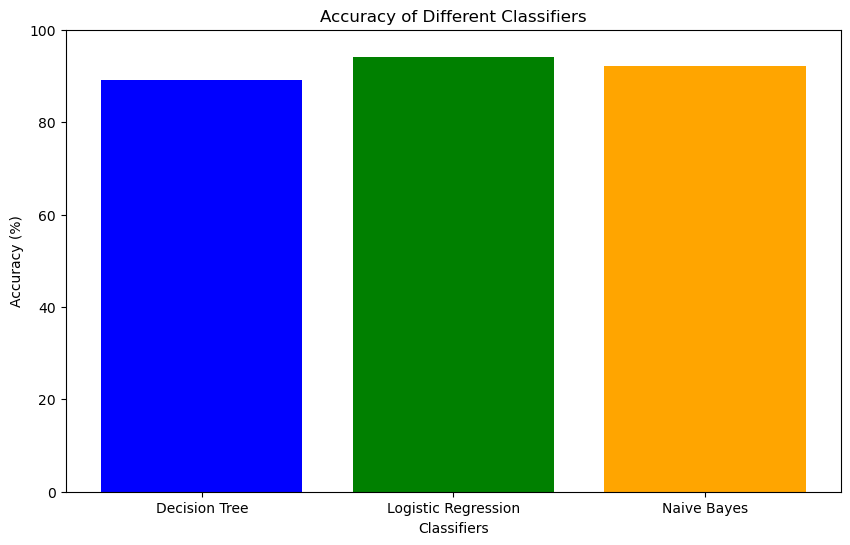

In [24]:
import matplotlib.pyplot as plt

accuracies = [accuracy, accuracy1, accuracy2]

accuracies_percent = [acc * 100 for acc in accuracies]

classifiers = ['Decision Tree', 'Logistic Regression', 'Naive Bayes']

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies_percent, color=['blue', 'green', 'orange'])
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

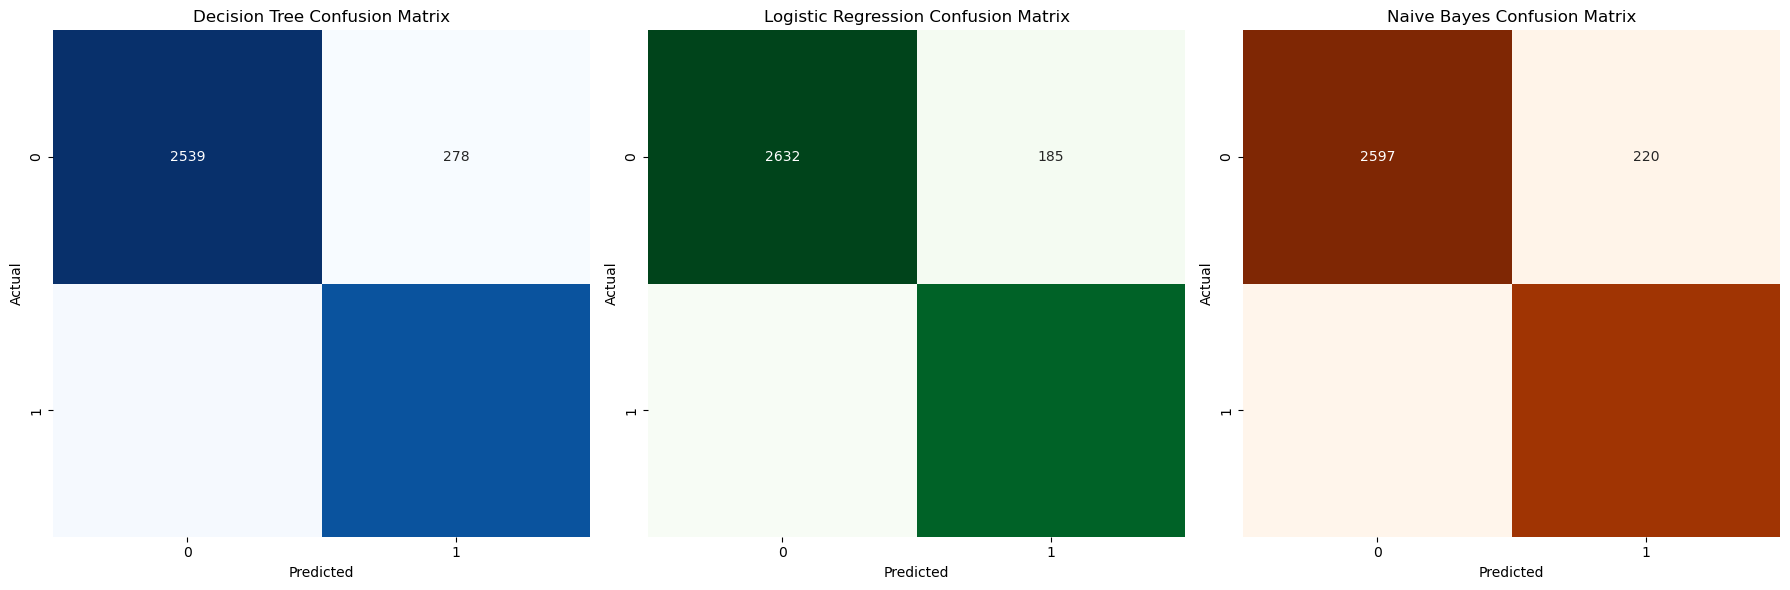

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, pred_dt)
cm_lr = confusion_matrix(y_test, pred_lr)
cm_nb = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
